# 05 - Taming Text

## Background

In this homework you will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy. You can find the corpus in the hillary-clinton-emails directory of this repository, while more detailed information about the schema is available here.
## Assignment

    Generate a word cloud based on the raw corpus -- I recommend you to use the Python word_cloud library. With the help of nltk (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

    Find all the mentions of world countries in the whole corpus, using the pycountry utility (HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) Perform sentiment analysis on every email message using the demo methods in the nltk.sentiment.util module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?

    Using the models.ldamodel module from the gensim library, run topic modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which returns topics that you consider to be meaningful at first sigh

For the first exercise, we will remove all the headings of the email and join them in a same string. This will allow us creat the wordcloud easily (by using the wordcloud filters) .

{'', "who's", 'ours', 'who', "isn't", 'she', 'when', 'because', 'each', 'this', "there's", "what's", 'weeks', 'they', 'do', 'what', 'is', 'months', "let's", 'over', 'more', 'our', "we're", "here's", 'into', 'off', 'thing', 'why', 'does', 'very', "when's", 'r', 'day', 'should', 'them', 'nor', 'both', 'having', 'then', 'yourself', 'at', 'same', 'such', 'too', "can't", 'few', "she'd", 'again', 'can', "don't", 'myself', "we'll", 'so', 'www', 'before', 'AM', 'being', 'are', 'an', 'ourselves', 'by', 'any', 'those', 'questions', 'we', 'date', "she'll", 'issue', 'or', 'only', 'on', 'of', 'down', 'up', 'you', "we'd", "he'll", 'am', 'yours', 'from', "you've", 'issues', 'like', 'out', 'with', 'where', "hasn't", 'in', "i'd", 'above', "couldn't", 'him', "you'll", 'have', "i'm", 'could', "shan't", 'get', "we've", 'PM', 'but', "i'll", 'it', "wouldn't", 'New', 'days', "it's", 'most', 'here', 'while', 'that', "that's", 'than', 'me', 'own', 'to', 'some', 'been', "doesn't", 'itself', 'be', 'which', 'whom

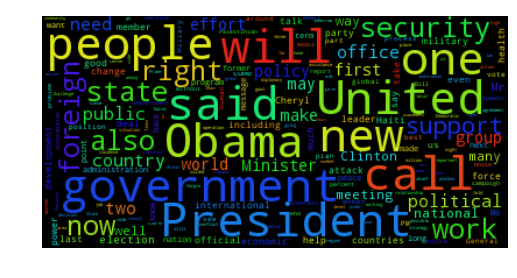

In [90]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
df=pd.read_csv('hillary-clinton-emails/Emails.csv')
word_c=WordCloud()
df_aux=df
# This are the STOPWORDS facilitated by wordcloud library 
print(STOPWORDS)
STOPWORDS.add('questions')
STOPWORDS.add('today')
STOPWORDS.add('day')
STOPWORDS.add('days')
STOPWORDS.add('year')
STOPWORDS.add('years')
STOPWORDS.add('week')
STOPWORDS.add('weeks')
STOPWORDS.add('month')
STOPWORDS.add('months')
STOPWORDS.add('date')
STOPWORDS.add('time')
STOPWORDS.add('PM')
# AM refers to Armenia in pycountry countries.alpha2, but we realised that is repeated due to due times.
STOPWORDS.add('AM')
STOPWORDS.add('New')
STOPWORDS.add('issue')
STOPWORDS.add('issues')
STOPWORDS.add('Thank')
STOPWORDS.add('thank')
STOPWORDS.add('thanks')
STOPWORDS.add('Mr')
STOPWORDS.add('thing')

# For the elimination of the headers from each email, we have created some functions.

def last_subject(dataFrame):
    return dataFrame.RawText.apply(lambda x: x[x.rfind('Subject:')+len('Subject: '):])
def remove_title(dataFrame):
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub(r'[UNCLAS]*[WAIVER.].*','\n ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub(r'[RELEASE].*','\n',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Date:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Doc',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('TBD',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Drafted:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Closed Press',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('People Expected','',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('FROM:','',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('For:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('FOR:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('fwd:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('FWD:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('From:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('TO:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('to:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Dist:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('CC:',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('Case',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub(' pm ',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('#',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('"The ',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub(' am ',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('The ',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('<http://www',' ',x))
    dataFrame.RawText=dataFrame.RawText.apply(lambda x: re.sub('http://www',' ',x))


    return dataFrame.RawText

# we simplify the wordcloud function call.
def process(allvals):
    wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(allvalues)
    return wordcloud

#     for i in dataFrame.RawText:
#     return dataFrame.RawText.apply(lambda x: np.array((cv.fit_transform([x]).toarray().ravel()).get_feature_names()))
df_aux.RawText=last_subject(df_aux)
df_aux.RawText=remove_title(df_aux)
allvalues=df_aux.RawText.str.cat(sep=' ')
textcount=process(allvalues)
textcount.words_
plt.imshow(textcount)
plt.axis('off')
plt.show()

As we see in this first wordcloud, not every word has the same importance or give us information.
This is why we will try to filter a little bit more our word-bag, trying to extract nouns and verbs. 

In [91]:
import nltk as nltk
# We want to do a wordcloud just of the nouns and verbs (separately)
allvalues_tk = nltk.word_tokenize(allvalues)
word_tag_fd = nltk.pos_tag(allvalues_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
allnoun=[wt[0] for wt in word_tag_fd if wt[1] == 'NOUN'] 
# We want to do a wordcloud just of the nouns
allverb=[wt[0] for wt in word_tag_fd if wt[1] == 'VERB'] 

NOUN


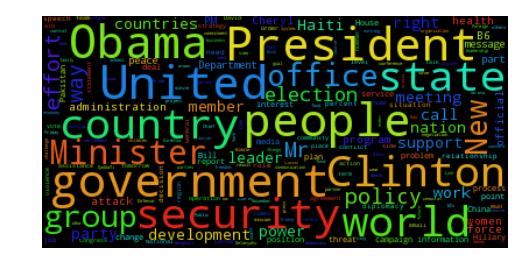

VERB


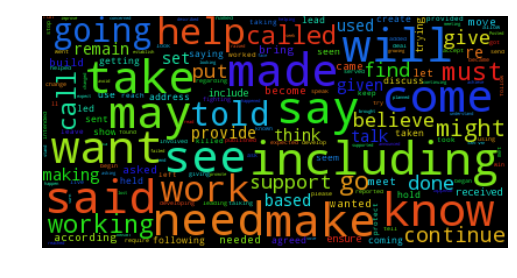

In [92]:
# Lets plot the new wordcloud
allnounstem=allnoun
print('NOUN')
wordcloud_NOUN = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(pd.Series(allnoun).str.cat(sep=' '))
plt.imshow(wordcloud_NOUN)
plt.axis('off')
plt.show()
print('VERB')
wordcloud_NOUN = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(pd.Series(allverb).str.cat(sep=' '))
plt.imshow(wordcloud_NOUN)
plt.axis('off')
plt.show()

NOUN


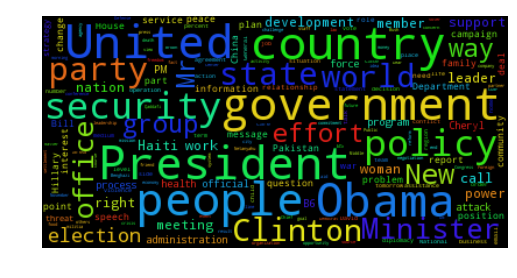

VERB


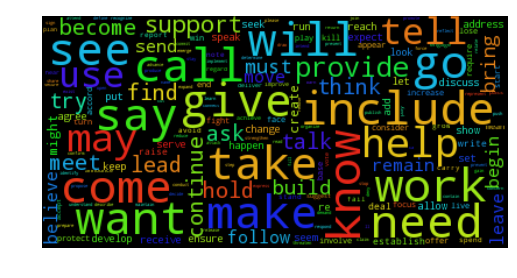

In [93]:
# Can we do it better?
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
st = LancasterStemmer()
wnl = WordNetLemmatizer()

for index,i in enumerate(allnoun):
    allnoun[index]=wnl.lemmatize(i)
# allvalues_tk.apply(lambda x: st.stem(x))
wordcloud_NOUN = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(pd.Series(allnoun).str.cat(sep=' '))
print('NOUN')
plt.imshow(wordcloud_NOUN)
plt.axis('off')
plt.show()

for index,i in enumerate(allverb):
    allverb[index]=wnl.lemmatize(i,'v')
# allvalues_tk.apply(lambda x: st.stem(x))
wordcloud_VERB = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(pd.Series(allverb).str.cat(sep=' '))
print('VERB')
plt.imshow(wordcloud_VERB)
plt.axis('off')
plt.show()

We can si thata after the lemmatization over the nouns, the wordcloud hasn't change so much. Some of the most used words have change a little bit their size (like "country"). However, we need to be careful with this tool because we can also be mixing information ("country" is probably refered to USA in most cases and "countries" could be used for the rest).
In the case of the verbs, changes are significantly different and could has more sense to use the lemanization, although the information obtain from the verb is no so obvious as the one with the nouns. 

NOUN


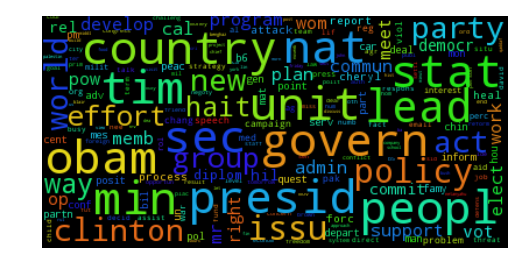

In [94]:
# Could the stemming give us more interesting info?.
for index,i in enumerate(allnounstem):
    allnounstem[index]=st.stem(i)
wordcloud_NOUN = WordCloud(max_font_size=40,stopwords=STOPWORDS).generate(pd.Series(allnounstem).str.cat(sep=' '))
print('NOUN')
plt.imshow(wordcloud_NOUN)
plt.axis('off')
plt.show()

As we can see, te infromation get mixed as the size of word more equal.

In [95]:
# nltk.download()

## Countries & sentiments
Here we start the second task of the assigment. First, we will finde all the mentions countries using the pycountry library

In [96]:
import pycountry
# Note that in this version of pycountry, the method that need to be applyed to country is alpha_2 and not alpha2. 
# In your version could be the opposite.
countries={}
for country in pycountry.countries:
    countries[country.name.lower()] = [country.alpha_2,country.alpha_3]
countries['switzerland']

['CH', 'CHE']

In [97]:
# This function find and extract a sentence that contains a country.
def findReference(text):
    text=text.lower()
    references={}
    for line in text.splitlines():
        if(len(line)>1):
            for word in line.split():
                if word in countries:
                    if(word in references):
                        references[word].append(line)
                    else:
                        references[word]=[]
                        references[word].append(line)
                else:
                    for country_name in countries:
                        if(word in countries[country_name]):
                            if(word in references):
                                references[word].append(line)
                            else:
                                references[word]=[]
                                references[word].append(line)
    return references

references=findReference(allvalues)


In [98]:
# Here you can see an example: 
references['morocco']

['from morocco here to the benjamin franklin ',
 'happened far away in benghazi, we found a reminder of the deep bounds that connect morocco',
 'pleased to announce that later this year we will hold a morocco business development',
 'particular goal of mine since so much trade from morocco goes to ',
 'appreciates the constructive role morocco is playing on the un ',
 "-  king of morocco has not gotten' back to us with a time but ops will try again when its a reasonable hour for the",
 '-  king of morocco has not gotten back to us with a time but ops will try again when its a reasonable hour for the',
 'cafe in marrakesh, morocco that is frequented by ',
 'marrakesh, morocco that is frequented by ',
 'marrakesh, morocco that is frequented by ',
 '-  king of morocco has not gotten back to us with a time but ops will try again when its a reasonable hour for the',
 '-  king of morocco has not gotten back to us with a time but ps will try again when its a reasonable hour for the',
 '-  kin

With this, we can proceed to the sentiment analysis:

In [107]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import nltk

n_instances = 100
tokens=nltk.word_tokenize(references['morocco'][0])
# tokens
tagged=nltk.pos_tag(tokens)
tagged

def sentimentAnalyzer(countriesRef):
    sid = SentimentIntensityAnalyzer()
    sentimentRef={}
    for country in countriesRef:

        sentimentRef[country]={}
        sentimentRef[country]['totRefs']=0
        for reference in countriesRef[country]:

            sentimentRef[country]['totRefs']+=1
            ss = sid.polarity_scores(reference)
            for k in sorted(ss):
                if(k is not 'compound'):
                    if(k not in sentimentRef[country]):
                        sentimentRef[country][k]=ss[k]
                    else:
                        sentimentRef[country][k]+=ss[k]
    return sentimentRef 
ref_aux={}
ref_aux['morocco']=references['morocco']
sentiments=sentimentAnalyzer(references)

In [108]:
# We already go the sentiments for each country in an absolute value. Let remove the neutral opinions
# and pass the results to relative values.
for country in references:
    if(sentiments[country]['neu']<sentiments[country]['totRefs']):
        sentiments[country]['diff']=sentiments[country]['totRefs']-sentiments[country]['neu']
        sentiments[country]['neg_rel']=sentiments[country]['neg']/sentiments[country]['diff']
        sentiments[country]['pos_rel']=sentiments[country]['pos']/sentiments[country]['diff']
    else:
        sentiments[country]['diff']=0
        sentiments[country]['neg_rel']=0
        sentiments[country]['pos_rel']=0
sentiments_aux=sentiments

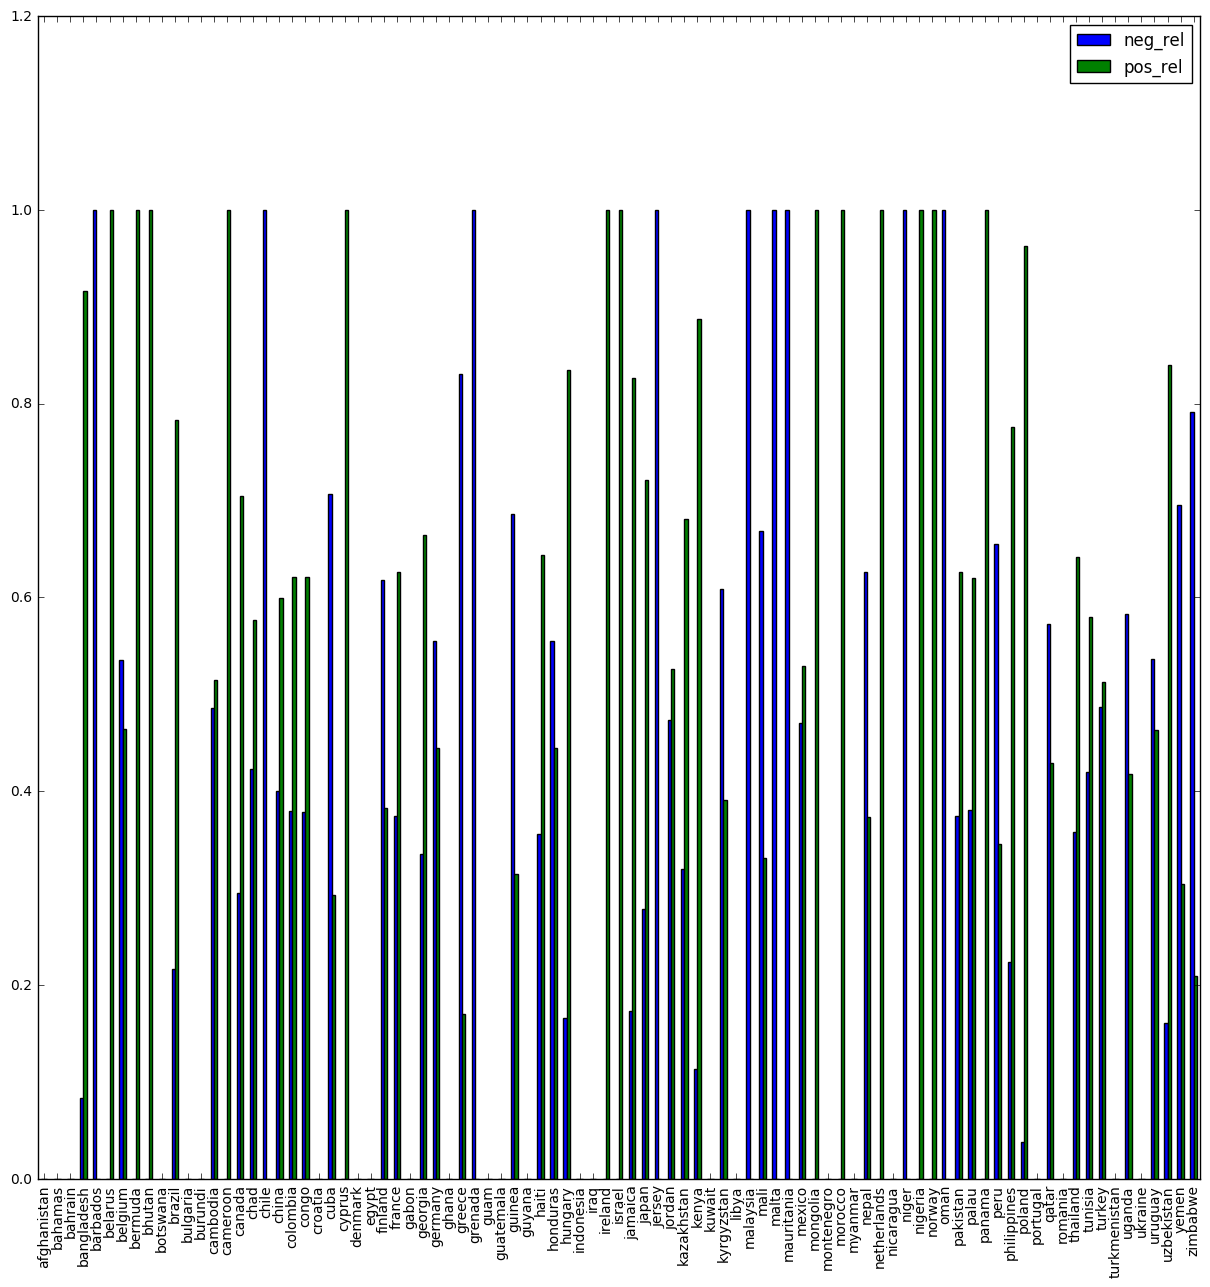

,neg_rel,pos_rel
afghanistan,0.000000,0.000000
bahamas,0.000000,0.000000
bahrain,0.000000,0.000000
bangladesh,0.083753,0.916247
barbados,1.000000,0.000000
belarus,0.000000,1.000000
belgium,0.535332,0.464668
bermuda,0.000000,1.000000
bhutan,0.000000,1.000000
botswana,0.000000,0.000000


In [106]:
# We move our results to a dataframe and plot it from there
DF_sentiments=pd.DataFrame(sentiments_aux)

DF_sentiments=DF_sentiments.transpose()
DF_sentiments_aux=DF_sentiments.drop(['neu','pos','diff','totRefs','neg'],1)
DF_sentiments_aux.plot(kind='bar',figsize=(15,15))
plt.show()

DF_sentiments_aux.head(10)

# Topic modeling 

For the Topic modeling, we are going to work with the email seperatly. Becouse of that, we will need to apply some filtering again over each text.
One of them will be the lemmatizer, which before gave us good result.

In [110]:
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
stopwords.words('english')
lista=[]
listainner=[]
# We want to tokenize the email. During the process, we will eliminate dates and word shorter than 3 characters.
for rawtext in df_aux.RawText.values:
        for word in rawtext.split():
            word=re.sub(r'\d{2}/\d{2}/\d{2,4}', ' ', word)
            if(len(word)<3):
                continue
            listainner.append(word)
        if(listainner): # we append only if is not empty
            lista.append(listainner)
        listainner=[]
# After doing a first try, we decided  just keep the nouns, adj and some extra words, which could be names.
lista2=[pos_tag(listainner,tagset='universal') for listainner in lista]
lista2=[[wnl.lemmatize(wt[0]) for wt in listainner if (wt[1] == 'NOUN' or wt[1]== 'ADJ' or wt[1] == 'X')] for listainner in lista2]
# We will pass the stopword from the nltk library
stop = set(stopwords.words('english'))

lista2=[[word.lower() for word in listainner] for listainner in lista2]
lista2 = [[word for word in listainner if word not in stop] for listainner in lista2]
lista2 = [[word for word in listainner if word not in STOPWORDS] for listainner in lista2]

# We keep the most used words. 100 repetition minimum
frequency = defaultdict(int)
for text in lista2:
     for token in text:
            frequency[token] += 1
lista2 = [[token for token in text if frequency[token] >100]
         for text in lista2]
# Remove blanck
lista2 = [word for word in lista2 if word !=[]]
dictionary = corpora.Dictionary(lista2)
print(dictionary)
print("\n")

corpus = [dictionary.doc2bow(text) for text in lista]
# corpus
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]


Dictionary(594 unique tokens: ['personal', 'good', 'missile', 'number', 'blair']...)




We will show the topics obtain by using the Lda model

In [111]:
lda = ldamodel.LdaModel(corpus_tfidf,id2word=dictionary, num_topics=10)

topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lda.print_topics(10,20)]

[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]


topic 0: "great" "help" "case" "work" "many" "good" "relief" "much" "share" "people" "hope" "state" "disaster" "group" "visit" "news" "need" "everything" "election" "anything" 

topic 1: "talk" "list" "update" "better" "phone" "someone" "happy" "request" "document" "final" "hospital" "status" "hour" "sure" "next" "language" "order" "child" "peace" "blair" 

topic 2: "letter" "next" "home" "settlement" "vote" "press" "likely" "country" "legal" "city" "draft" "violence" "construction" "morning" "good" "statement" "lot" "memo" "police" "court" 

topic 3: "tomorrow" "meeting" "peace" "office" "conversation" "percent" "house" "support" "please" "article" "good" "role" "last" "something" "treaty" "attempt" "close" "one" "recent" 

topic 4: "email" "trip" "note" "statement" "one" "address" "right" "health" "name" "care" "times" "plan" "people" "event" "may" "agreement" "phone" "confidential" "disease" 

topic 5: "dinner" "event" "may" "humanitarian" "agency" "plan" "meet" "available" "confide

[None, None, None, None, None, None, None, None, None, None]

Now we can creat new vectors and find the most related topic to it:

In [112]:
new_doc = "Europe will probably join us, nuclear war, terrorist atack"
new_doc=new_doc.lower().split()
new_doc=[wnl.lemmatize(word) for word in new_doc]

new_vec = dictionary.doc2bow(new_doc)
# print(new_vec)
relevancy=[print(tupla)for tupla in lda[new_vec] if tupla[1] > 0.1]

# print(lda[new_vec])

(3, 0.69995555259976328)
